<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

### Import the dataset.

In [1]:
import pandas as pd
car = pd.read_csv("./car_sales.csv",encoding="latin_1")
# car.drop('Unnamed: 0',axis=1,inplace=True)
car.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### Check the shape of the dataset.

In [2]:
def lr():
    return car.shape 
lr()

(9576, 10)

### Check the descriptive stats of the dataset.

In [3]:
def lr():
    return car.describe()
lr()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


### Q 1. Write a code to understand the total count and percentage of missing values.

In [4]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

              Total   Percent
drive           511  0.053363
engV            434  0.045322
model             0  0.000000
year              0  0.000000
registration      0  0.000000
engType           0  0.000000
mileage           0  0.000000
body              0  0.000000
price             0  0.000000
car               0  0.000000


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [5]:
# car["drive"].fillna(car.groupby(["car",'model','body'])["drive"].transform("count"))

# pd.DataFrame(data=car.groupby(["car",'model']).drive.value_counts())
# (pd.DataFrame(data=car.groupby(["car",'model']).drive.value_counts(), columns = ["counts"]).reset_index(inplace=True))
# df.columns = ["counts"]
# df.reset_index(inplace=True)
# df[(df.car == 'Acura')&(df.counts == df[(df.car == 'Acura')].counts.max())].drive[0]

In [6]:
import numpy as np
from sklearn.preprocessing import Imputer
def lr():
#     imputer = Imputer(missing_values='NaN',strategy="most_frequent",axis=0)
#     imputer.fit_transform(car)
    car.loc[car[(car.price <= 0)].index,'price'] = np.NaN
    car["price"].fillna(car.groupby(["car",'model'])["price"].transform("mean"), inplace=True)
    car["engV"].fillna(car.groupby(["car",'model'])["engV"].transform("mean"), inplace=True)
    car["drive"].fillna(car["drive"].value_counts().index[0], inplace=True)
    car.drop_duplicates(keep="first",inplace=True)
    car.dropna(axis=0, inplace=True)
    return
lr()
print(car.isnull().sum())
print(car.shape)
print(car.drive.unique())
print(car[(car.price == 0)].price)

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64
(9423, 10)
['full' 'rear' 'front']
Series([], Name: price, dtype: float64)


### Q 3. Create a dummy variable for "body",  "drive" & "engType" and  drop the original variable.

In [7]:
car_dummy =pd.DataFrame()                                             # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['body','drive','engType','registration'], drop_first=True)
    return dummies
car_dummy = lr(car)
print(car_dummy.head())
print(car_dummy.columns)

             car    price  mileage      engV  year    model  body_hatch  \
0           Ford  15500.0       68  2.500000  2010     Kuga           0   
1  Mercedes-Benz  20500.0      173  1.800000  2011  E-Class           0   
2  Mercedes-Benz  35000.0      135  5.500000  2008   CL 550           0   
3  Mercedes-Benz  17800.0      162  1.800000  2012    B 180           0   
4  Mercedes-Benz  33000.0       91  2.557887  2013  E-Class           0   

   body_other  body_sedan  body_vagon  body_van  drive_full  drive_rear  \
0           0           0           0         0           1           0   
1           0           1           0         0           0           1   
2           1           0           0         0           0           1   
3           0           0           0         1           0           0   
4           0           0           1         0           0           0   

   engType_Gas  engType_Other  engType_Petrol  registration_yes  
0            1              0   

### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['car', 'model'] ```

In [8]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['car', 'model']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
print (car_dummy)

              price  mileage      engV  year  body_hatch  body_other  \
0      15500.000000       68  2.500000  2010           0           0   
1      20500.000000      173  1.800000  2011           0           0   
2      35000.000000      135  5.500000  2008           0           1   
3      17800.000000      162  1.800000  2012           0           0   
4      33000.000000       91  2.557887  2013           0           0   
5      16600.000000       83  2.000000  2013           0           0   
6       6500.000000      199  2.000000  2003           0           0   
7      10500.000000      185  1.500000  2011           0           0   
8      21500.000000      146  1.800000  2012           0           0   
9      22700.000000      125  2.200000  2010           0           0   
10     20447.154000        0  1.200000  2016           0           0   
11     20400.000000      190  1.800000  2011           0           0   
12     22500.000000      164  1.800000  2012           0        

In [9]:
def lr():
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    plt.show()
    return None 
lr()

<Figure size 640x480 with 1 Axes>

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [10]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
# print (car_dummy)
print (car_dummy.columns)

car_dummy.describe()


              price  mileage       engV  year  body_hatch  body_other  \
4      33000.000000       91   2.557887  2013           0           0   
16    129222.000000        2   5.000000  2016           0           0   
29    105999.000000        0   2.980000  2016           0           0   
30     13980.000000       31   0.555000  2013           1           0   
31     17300.000000       24   0.555000  2013           1           0   
37      2850.000000      260   3.664691  1999           0           0   
39    200000.000000       19   3.500000  2013           0           0   
41     13275.000000       12   0.555000  2013           1           0   
56     17000.000000       38   0.555000  2013           1           0   
66    195000.000000        0   4.500000  2016           0           0   
76    114900.000000       25   4.800000  2013           0           0   
109    12400.000000       26   0.555000  2011           1           0   
123   107999.000000        0   2.980000  2016      

,price,mileage,engV,year,body_hatch,body_other,body_sedan,body_vagon,body_van,drive_full,drive_rear,engType_Gas,engType_Other,engType_Petrol,registration_yes
count,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.0,8783.000000,8783.000000
mean,14243.072593,141.557441,2.211372,2006.468291,0.126153,0.084481,0.384493,0.078219,0.112718,0.255038,0.144484,0.191962,0.0,0.480929,0.940909
std,15191.622808,92.459946,0.930200,6.799408,0.332040,0.278124,0.486503,0.268532,0.316265,0.435907,0.351599,0.393866,0.0,0.499665,0.235809
min,280.000000,0.000000,0.600000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5450.000000,75.000000,1.600000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,9500.000000,130.000000,2.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,16600.000000,197.000000,2.500000,2011.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,105000.000000,600.000000,7.200000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [11]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['price']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std.shape)
print(car_modify.head(1))
print(std[1])

(8783, 14)
   mileage  engV  year  body_hatch  body_other  body_sedan  body_vagon  \
0       68   2.5  2010           0           0           0           0   

   body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0         0           1           0            1              0   

   engType_Petrol  registration_yes  
0               0                 1  
[ 0.34008618 -0.44226559  0.66652381 -0.37995371 -0.30377143  1.26523877
 -0.29130177 -0.35642262 -0.58510734  2.43335114  2.05167524  0.
 -0.96255856  0.2506043 ]


### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['mileage', 'engV', 'year', 'age', 'mpy', 'body_hatch',
       'body_other', 'body_sedan', 'body_vagon', 'body_van', 'drive_full',
       'drive_rear', 'engType_Gas', 'engType_Other', 'engType_Petrol',
       'registration_yes'] ```

In [12]:
columns = ['mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
print(cars.head())
print(cars.shape)

    mileage      engV      year  body_hatch  body_other  body_sedan  \
0 -0.795605  0.310303  0.519444   -0.379954   -0.303771   -0.790365   
1  0.340086 -0.442266  0.666524   -0.379954   -0.303771    1.265239   
2 -0.070926  3.535598  0.225284   -0.379954    3.291949   -0.790365   
3  0.221109 -0.442266  0.813604   -0.379954   -0.303771   -0.790365   
4 -0.633364 -0.227246  0.960684   -0.379954   -0.303771   -0.790365   

   body_vagon  body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0   -0.291302 -0.356423    1.709088   -0.410956     2.051675            0.0   
1   -0.291302 -0.356423   -0.585107    2.433351     2.051675            0.0   
2   -0.291302 -0.356423   -0.585107    2.433351    -0.487407            0.0   
3   -0.291302  2.805658   -0.585107   -0.410956    -0.487407            0.0   
4   -0.291302 -0.356423    1.709088   -0.410956    -0.487407            0.0   

   engType_Petrol  registration_yes  
0       -0.962559          0.250604  
1       -0.962559     

### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes']```

In [13]:
X = pd.DataFrame()
feature_cols = ['mileage', 'engV', 'year', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Petrol', 'registration_yes']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

       mileage      engV      year  body_van  drive_full  drive_rear  \
0    -0.795605  0.310303  0.519444 -0.356423    1.709088   -0.410956   
1     0.340086 -0.442266  0.666524 -0.356423   -0.585107    2.433351   
2    -0.070926  3.535598  0.225284 -0.356423   -0.585107    2.433351   
3     0.221109 -0.442266  0.813604  2.805658   -0.585107   -0.410956   
4    -0.633364 -0.227246  0.960684 -0.356423    1.709088   -0.410956   
5     0.621305 -0.227246 -0.510116 -0.356423   -0.585107   -0.410956   
6     0.469879 -0.764795  0.666524 -0.356423   -0.585107   -0.410956   
7     0.048051 -0.442266  0.813604 -0.356423   -0.585107    2.433351   
8    -0.179087 -0.012226  0.519444 -0.356423   -0.585107    2.433351   
9    -1.531101 -1.087325  1.401924 -0.356423   -0.585107   -0.410956   
10    0.523960 -0.442266  0.666524 -0.356423   -0.585107    2.433351   
11    0.242741 -0.442266  0.813604 -0.356423   -0.585107    2.433351   
12    0.632121 -0.534417 -1.539676 -0.356423   -0.585107    2.43

### Check for the type and shape of X.

In [14]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(8783, 9)


### Q 9. Extract y (dependent variable) for model building.
```['price']```

In [15]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['price']
    return y
y = lr(car_dummy)
print(y.head())

0    15500.0
1    20500.0
2    35000.0
3    17800.0
5    16600.0
Name: price, dtype: float64


### Check for the type and shape of y. 

In [16]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(8783,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [17]:
from sklearn.cross_validation import train_test_split
##############################

test_size=0.30
random_state = 1
poly_degree = 3

##############################
def lr():
    return train_test_split(X, y, test_size=test_size, random_state=random_state)
X_train, X_test, y_train, y_test = lr()

C:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Check the shape of  X and y of train dataset.

In [18]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(6148, 9)
(6148,)


### Check the shape of X and y of test dataset.

In [19]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(2635, 9)
(2635,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### Q12. Fit the linear model on X_train and y_train.

In [21]:
def lr():
    model_lin = linreg.fit(X_train, y_train)
#     print(model_lin.summary)
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [22]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 14379.224792429915
Coefficients: [-3873.63109586  6091.55706451  4396.31589972  -851.15890158
  3243.57052802  1260.06135233 -2934.10093331 -2552.87310484
  1316.06550935]


### Q.14 Zip the features to pair the feature names with the coefficients.

In [23]:
def lr():
    feature_cols.insert(0,'Intercept')
#     print(feature_cols)
    coef = linreg.coef_.tolist()
#     print(coef)
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 14379.224792429915
mileage -3873.6310958568624
engV 6091.557064511045
year 4396.31589971602
body_van -851.1589015802435
drive_full 3243.5705280190964
drive_rear 1260.0613523331187
engType_Gas -2934.1009333082898
engType_Petrol -2552.8731048416294
registration_yes 1316.0655093482776


###  Q 15. Predict the train value using the built model.

In [24]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['price']
    head = pred.head()
    return head
lr()

,price
0,2176.769378
1,6322.838724
2,24904.712868
3,36616.194639
4,14387.169569


### Q 16. Predict the test value using the built model.

In [25]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['price']
    head = pred_test.head()
    return head
lr()

,price
0,24593.283633
1,21617.904627
2,12600.080843
3,3669.695130
4,5080.245203


<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [26]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 6269.856423225731
MAE for test set is 6238.519039586535


### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [27]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 94143717.42278874
MSE for test set is 87233651.78341211


### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [28]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 9702.768544224311
RMSE for test set is 9339.89570516781


### Q 20. Evaluate the model using R-square value for both train and test.

In [29]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.6052198894893046
R2 for test set is 0.5892821683518032


In [30]:
def lr():
    p = X.shape[1]
    n_train = y_train.size
    n_test = y_test.size
    R2_train = metrics.r2_score(y_true=y_train, y_pred=y_pred_train)
    R2_test = metrics.r2_score(y_true=y_test, y_pred=y_pred_test)
    # Calculate Adjusted r2 for train
    AR2_train = 1-((1-R2_train)*(n_train-1)/(n_train-p-1))
    # Calculate Adjusted r2 for test 
    AR2_test = 1-((1-R2_test)*(n_test-1)/(n_test-p-1))
    # print r2 for train
    print("Adjusted R squared score for Training Set is {0}".format(AR2_train))
    # print r2 for test
    print("Adjusted R squared score for Test Set is {0}".format(AR2_test))
lr()

Adjusted R squared score for Training Set is 0.6046410330222801
Adjusted R squared score for Test Set is 0.5878739929290094


### Polynomial Regrassion

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_reg = PolynomialFeatures(degree=poly_degree)
X_poly = poly_reg.fit_transform(X)

In [33]:
def lr():
    print(type(X_poly))
    print(X_poly.shape)
lr()

<class 'numpy.ndarray'>
(8783, 220)


In [34]:
from sklearn.cross_validation import train_test_split
def lr():
    return train_test_split(X_poly, y, test_size=test_size, random_state=random_state)
X_poly_train, X_poly_test, y_train, y_test = lr()

In [35]:
def lr():
    model_poly = linreg.fit(X_poly_train, y_train)
#     print(model_poly.summary)
lr()

In [36]:
y_poly_pred_train = linreg.predict(X_poly_train)
pred= pd.DataFrame(y_poly_pred_train)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()



,price_pred
0,5729.543945
1,6387.934570
2,23353.262695
3,82230.293945
4,10125.403320


In [37]:
def lr():
    model = linreg.fit(X_poly_test, y_test)  
lr()

In [38]:
y_poly_pred_test = linreg.predict(X_poly_test)
pred= pd.DataFrame(y_poly_pred_test)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()
# print(pred.head())
# print(y_test.reset_index().drop("index",axis=1).head())
diff_pred = pd.concat([pred, y_test.reset_index().drop("index",axis=1)],axis=1)
diff_pred["diff_per"] = (diff_pred.price_pred - diff_pred.price)*100/diff_pred.price
print("Total : {0}".format(diff_pred.shape[0]))
print("Diff less than 10% : {0}".format(diff_pred[diff_pred.diff_per.abs() < 10].shape[0]))
print("Diff between 10-20% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 10)&(diff_pred.diff_per.abs() < 20)].shape[0]))
print("Diff between 20-30% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 20)&(diff_pred.diff_per.abs() < 30)].shape[0]))
print("Diff between 30-40% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 30)&(diff_pred.diff_per.abs() < 40)].shape[0]))
print("Diff between 40-50% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 40)&(diff_pred.diff_per.abs() < 50)].shape[0]))
print("Diff more than 50% : {0}".format(diff_pred[diff_pred.diff_per.abs() >= 50].shape[0]))

# diff_pred.diff_per.abs()
diff_pred.head(30)

Total : 2635
Diff less than 10% : 652
Diff between 10-20% : 571
Diff between 20-30% : 463
Diff between 30-40% : 268
Diff between 40-50% : 178
Diff more than 50% : 503


,price_pred,price,diff_per
0,21639.25,21000.000000,3.044048
1,21663.75,12900.000000,67.936047
2,10366.00,12500.000000,-17.072000
3,7424.25,7000.000000,6.060714
4,6557.75,6000.000000,9.295833
5,3260.75,2900.000000,12.439655
6,14596.75,11000.000000,32.697727
7,18609.50,50000.000000,-62.781000
8,802.75,3667.950000,-78.114478
9,6100.25,4900.000000,24.494898


In [39]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_poly_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_poly_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 3688.6595883739583
MAE for test set is 3497.274261782314


In [40]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_poly_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_poly_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 40346161.36404635
MSE for test set is 36167590.16313126


In [41]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_poly_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 6351.862826293272
RMSE for test set is 6013.949630910726


In [42]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_poly_pred_train) 
    R2_test = r2_score(y_test, y_poly_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.8308133301083667
R2 for test set is 0.8297139474955856


In [43]:
def lr():
    p = X_poly.shape[1]
    print(X_poly.shape)
    n_train = y_train.size
    n_test = y_test.size
    R2_train = metrics.r2_score(y_true=y_train, y_pred=y_poly_pred_train)
    R2_test = metrics.r2_score(y_true=y_test, y_pred=y_poly_pred_test)
    # Calculate Adjusted r2 for train
    print(n_train-p-1)
    AR2_train = 1-((1-R2_train)*(n_train-1)/(n_train-p-1))
    # Calculate Adjusted r2 for test 
    print(n_test-p-1)
    AR2_test = 1-((1-R2_test)*(n_test-1)/(n_test-p-1))
    # print r2 for train
    print("Adjusted R squared score for Training Set is {0}".format(AR2_train))
    # print r2 for test
    print("Adjusted R squared score for Test Set is {0}".format(AR2_test))
lr()

(8783, 220)
5927
2414
Adjusted R squared score for Training Set is 0.8245334132235751
Adjusted R squared score for Test Set is 0.8141949203410822


Text(0,0.5,'Price')

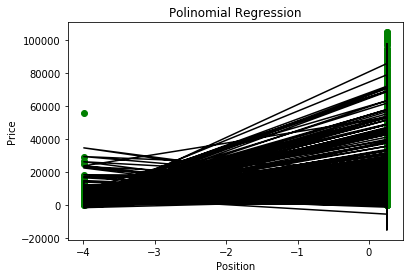

In [44]:
import matplotlib.pyplot as plt

plt.scatter(X_train.registration_yes, y_train, color='Green')
plt.plot(X_train.registration_yes, y_poly_pred_train, color='black')
plt.title('Polinomial Regression')
plt.xlabel('Position')
plt.ylabel('Price')

Text(0,0.5,'Price')

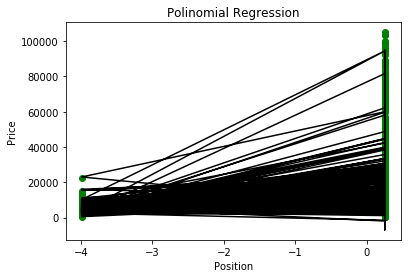

In [45]:
plt.scatter(X_test.registration_yes, y_test, color='Green')
plt.plot(X_test.registration_yes, y_poly_pred_test, color='black')
plt.title('Polinomial Regression')
plt.xlabel('Position')
plt.ylabel('Price')